# Implementación de un perceptrón multicapa usando 2 capas ocultas y regularización L2 para evitar un sobreajuste

## Regularización

La regularización es un conjunto de métodos para reducir el sobreajuste en modelos de aprendizaje automático. Normalmente, la regularización supone una disminución marginal de la precisión del entrenamiento a cambio de un aumento de la generabilidad.

La regularización abarca una variedad de técnicas para corregir el sobreajuste en los modelos de machine learning. Como tal, la regularización es un método para aumentar la generalización de un modelo, es decir, su capacidad de producir predicciones precisas en nuevos conjuntos de datos. La regularización proporciona esta mayor generalización a cambio de un mayor error de entrenamiento. En otras palabras, los métodos de regularización generalmente conducen a predicciones menos precisas en los datos de entrenamiento, pero más precisas en los datos de prueba.

## Regularizacion L2

La regularización L2 introduce un término adicional en la función de costo del modelo. Este término penaliza la suma de los cuadrados de los pesos (𝑤) del modelo, excluyendo el sesgo (𝑏):
$$CostoRegularizado= L(\hat{y},y)+λ∑w_j^2$$

**Relación con el gradiente**

En la práctica, la regularización L2 afecta las actualizaciones de los pesos durante el entrenamiento con gradiente descendente. La regla de actualización para un peso $w_j $ se convierte en:

$$w_j \gets w_j - \eta \frac{\partial \mathcal{L}}{\partial w_j} - \eta \lambda w_j$$

+ $\eta$: Tasa de aprendizaje.
+  $- \eta \lambda w_j $: Término adicional que reduce
+ $w_j$ proporcionalmente a su valor actual.

Este término introduce un "tirón" hacia 0 en cada iteración, lo que estabiliza los pesos.

+ Penalizar los pesos grandes obliga al modelo a aprender distribuciones más uniformes de los pesos.
+ La regularización L2 minimiza la magnitud de los pesos, lo que:
+ + Disminuye la complejidad del modelo.
+ + Reduce la sensibilidad del modelo al ruido en los datos.
+ Mejora la generalización

## Funciones de activación

Las funciones de activación son un componente integral de las redes neuronales que les permite aprender patrones complejos en los datos. Transforman la señal de entrada de un nodo de una red neuronal en una señal de salida que pasa a la capa siguiente. Sin funciones de activación, las redes neuronales se limitarían a modelar únicamente relaciones lineales entre entradas y salidas.

Las funciones de activación introducen no linealidades, lo que permite a las redes neuronales aprender mapeos muy complejos entre entradas y salidas.

Elegir la función de activación adecuada es crucial para entrenar redes neuronales que generalicen bien y proporcionen previsiones precisas. En este post, daremos una visión general de las funciones de activación más comunes, sus papeles y cómo seleccionar las funciones de activación adecuadas para diferentes casos de uso.

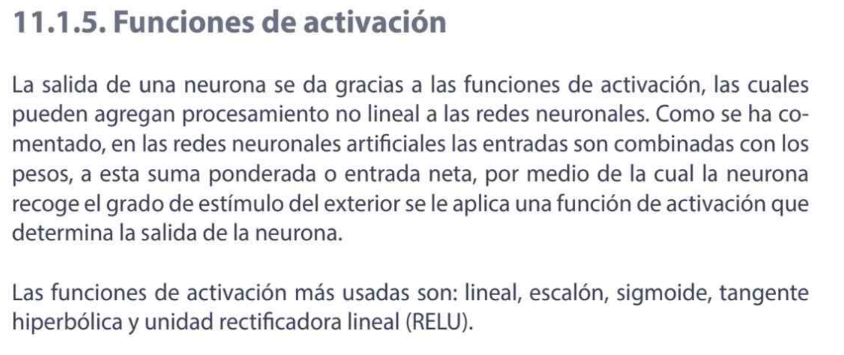

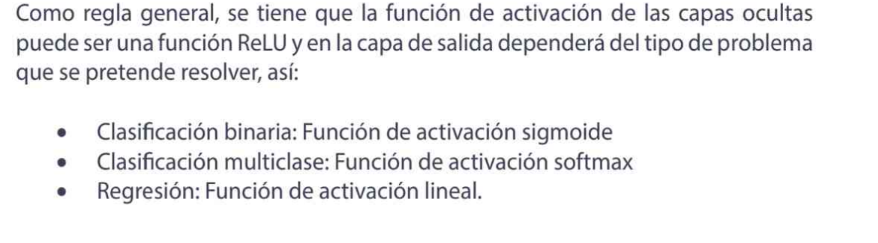

Funcion de activación ReLu:
$$f(x) = \max(0, x)$$

Función de activación Softmax:
$$\sigma(\mathbf{z})_i = \frac{e^{z_i}}{\sum_{j=1}^{N} e^{z_j}}
$$
+ $z$ es el vector de entrada
+ $N$ el número de clases
+ $z_i$ es el i-ésimo elemento del vector

## Función de costo

### Entropía cruzada

Originada en la teoría de la información, la entropía cruzada, denotada matemáticamente como $H(p, q)$, mide la diferencia entre dos distribuciones de probabilidad: la verdadera distribución $p$ y la distribución modelo $q$. La relevancia de esta métrica radica en su capacidad para cuantificar el número promedio de bits necesarios para identificar un evento de un conjunto de posibilidades, si un modelo de probabilidad incorrecto se utilizara en vez del verdadero.

Matemáticamente, si tomamos una distribución verdadera $p(x)$ y una distribución de modelo $q(x)$, la entropía cruzada se define como:

$$ H(p, q) = -sum_{x} p(x) log q(x) $$

Dentro de las aplicaciones prácticas, la entropía cruzada se ha convertido en una función de pérdida de facto para muchos tipos de problemas de clasificación. Su aplicación permite ajustar los parámetros del modelo de forma que se minimice la discrepancia entre la salida del modelo y la etiqueta real. La optimización de esta función en modelos como las redes neuronales se realiza comúnmente mediante algoritmos como el descenso del gradiente o sus variantes.

Una clave para entender su eficiencia es que la entropía cruzada penaliza fuertemente las clasificaciones incorrectas con una confianza alta. Esto empuja al modelo a ser no solo correcto sino también cauto en sus predicciones, acelerando el proceso de aprendizaje y mejorando potencialmente la convergencia del algoritmo.

Por ejemplo, comparada con la métrica del error cuadrático medio (MSE), la entropía cruzada normalmente resulta en una mejor convergencia al tratar con salidas probabilísticas debido a su relación con la divergencia de Kullback-Leibler (una medida de cuán una distribución de probabilidad difiere de una de referencia), y por ende, es más adecuada para reflejar la naturaleza logarítmica de la «sorpresa» inherente en la predicción de resultados categóricos.

**Compatibilidad:**

+ Softmax genera probabilidades, y la entropía cruzada calcula la pérdida directamente sobre esas probabilidades. \\
Este emparejamiento es matemáticamente eficiente y evita problemas numéricos, ya que muchas bibliotecas combinan Softmax y entropía cruzada en una sola operación optimizada para mayor estabilidad.


Librerías

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import tensorflow as tf

## Cargar conjunto de datos

MNIST

Inmediatamente separamos el conjunto de datos en prueba, entrenamiento y validación.

In [ ]:
# importar conjunto de datos
mnist = tf.keras.datasets.mnist
(Xm_train_full, Ym_train_full), (Xm_test, Ym_test) = mnist.load_data()

# Aplanar las imágenes (de 28x28 a 784)
Xm_train_full = Xm_train_full.reshape(Xm_train_full.shape[0], -1)  # (n, 784)
Xm_test = Xm_test.reshape(Xm_test.shape[0], -1)  # (n, 784)

# Dividir los datos de entrenamiento (55,000 para entrenamiento, 5,000 para validación)
Xm_train, Xm_val = Xm_train_full[:55000], Xm_train_full[55000:]
Ym_train, Ym_val = Ym_train_full[:55000], Ym_train_full[55000:]


Normalizar datos en el rango [0,1] por usar función de activación ReLu

In [ ]:
# normalizar
Xm_train = Xm_train / 255.0
Xm_val = Xm_val / 255.0
Xm_test = Xm_test / 255.0

In [ ]:
Xm_train.shape, Xm_val.shape, Xm_test.shape

((55000, 784), (5000, 784), (10000, 784))

In [ ]:
Xm_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

FASHION MNIST

In [ ]:
fmnist = tf.keras.datasets.fashion_mnist
(Xf_train_full, Yf_train_full), (Xf_test, Yf_test) = fmnist.load_data()

# Aplanar las imágenes (de 28x28 a 784)
Xf_train_full = Xf_train_full.reshape(Xf_train_full.shape[0], -1)  # (n, 784)
Xf_test = Xf_test.reshape(Xf_test.shape[0], -1)  # (n, 784)

# Dividir los datos de entrenamiento (55,000 para entrenamiento, 5,000 para validación)
Xf_train, Xf_val = Xf_train_full[:55000], Xf_train_full[55000:]
Yf_train, Yf_val = Yf_train_full[:55000], Yf_train_full[55000:]


Normalizar en el rango [0,1]

In [ ]:
# normalizar
Xf_train = Xf_train / 255.0
Xf_val = Xf_val / 255.0
Xf_test = Xf_test / 255.0

In [ ]:
Xf_train.shape, Xf_val.shape, Xf_test.shape

((55000, 784), (5000, 784), (10000, 784))

In [ ]:
Xf_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Modelo de preceptrón multicapa con una capa oculta

In [ ]:

# funcion de activacion sigmoide
def sigmoid(z):
    return 1. / (1. + np.exp(-z))

# codificar etiquetas categóricas
def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary

# modelo de perceptrón multicapa
class NeuralNetMLP:

    def __init__(self, num_features, num_hidden, num_classes, random_seed=123):
        super().__init__()

        self.num_classes = num_classes

        # hidden
        rng = np.random.RandomState(random_seed)

        self.weight_h = rng.normal(
            loc=0.0, scale=0.1, size=(num_hidden, num_features))
        self.bias_h = np.zeros(num_hidden)

        # output
        self.weight_out = rng.normal(
            loc=0.0, scale=0.1, size=(num_classes, num_hidden))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Hidden layer
        # input dim: [n_examples, n_features] dot [n_hidden, n_features].T
        # output dim: [n_examples, n_hidden]
        z_h = np.dot(x, self.weight_h.T) + self.bias_h
        a_h = sigmoid(z_h)

        # Output layer
        # input dim: [n_examples, n_hidden] dot [n_classes, n_hidden].T
        # output dim: [n_examples, n_classes]
        z_out = np.dot(a_h, self.weight_out.T) + self.bias_out
        a_out = sigmoid(z_out)
        return a_h, a_out

    def backward(self, x, a_h, a_out, y):

        #########################
        ### Output layer weights
        #########################

        # onehot encoding
        y_onehot = int_to_onehot(y, self.num_classes)

        # Part 1: dLoss/dOutWeights
        ## = dLoss/dOutAct * dOutAct/dOutNet * dOutNet/dOutWeight
        ## where DeltaOut = dLoss/dOutAct * dOutAct/dOutNet
        ## for convenient re-use

        # input/output dim: [n_examples, n_classes]
        d_loss__d_a_out = 2.*(a_out - y_onehot) / y.shape[0]

        # input/output dim: [n_examples, n_classes]
        d_a_out__d_z_out = a_out * (1. - a_out) # sigmoid derivative

        # output dim: [n_examples, n_classes]
        delta_out = d_loss__d_a_out * d_a_out__d_z_out # "delta (rule) placeholder"

        # gradient for output weights

        # [n_examples, n_hidden]
        d_z_out__dw_out = a_h

        # input dim: [n_classes, n_examples] dot [n_examples, n_hidden]
        # output dim: [n_classes, n_hidden]
        d_loss__dw_out = np.dot(delta_out.T, d_z_out__dw_out)
        d_loss__db_out = np.sum(delta_out, axis=0)


        #################################
        # Part 2: dLoss/dHiddenWeights
        ## = DeltaOut * dOutNet/dHiddenAct * dHiddenAct/dHiddenNet * dHiddenNet/dWeight

        # [n_classes, n_hidden]
        d_z_out__a_h = self.weight_out

        # output dim: [n_examples, n_hidden]
        d_loss__a_h = np.dot(delta_out, d_z_out__a_h)

        # [n_examples, n_hidden]
        d_a_h__d_z_h = a_h * (1. - a_h) # sigmoid derivative

        # [n_examples, n_features]
        d_z_h__d_w_h = x

        # output dim: [n_hidden, n_features]
        d_loss__d_w_h = np.dot((d_loss__a_h * d_a_h__d_z_h).T, d_z_h__d_w_h)
        d_loss__d_b_h = np.sum((d_loss__a_h * d_a_h__d_z_h), axis=0)

        return (d_loss__dw_out, d_loss__db_out,
                d_loss__d_w_h, d_loss__d_b_h)

minibatch

In [ ]:
num_epochs = 50
minibatch_size = 200


def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]

        yield X[batch_idx], y[batch_idx]


# iterate over training epochs
for i in range(num_epochs):

    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        Xm_train, Ym_train, minibatch_size)

    for X_train_mini, y_train_mini in minibatch_gen:

        break

    break

print(X_train_mini.shape)
print(y_train_mini.shape)

(200, 784)
(200,)


In [ ]:
def mse_loss(targets, probas, num_labels=10):
    onehot_targets = int_to_onehot(targets, num_labels=num_labels)
    return np.mean((onehot_targets - probas)**2)


def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

def compute_mse_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    mse, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):

        _, probas = nnet.forward(features)
        predicted_labels = np.argmax(probas, axis=1)

        onehot_targets = int_to_onehot(targets, num_labels=num_labels)
        loss = np.mean((onehot_targets - probas)**2)
        correct_pred += (predicted_labels == targets).sum()

        num_examples += targets.shape[0]
        mse += loss

    mse = mse/(i+1)
    acc = correct_pred/num_examples
    return mse, acc

In [ ]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1):

    epoch_loss = []
    epoch_train_acc = []
    epoch_valid_acc = []

    for e in range(num_epochs):

        # iterate over minibatches
        minibatch_gen = minibatch_generator(
            X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:

            #### Compute outputs ####
            a_h, a_out = model.forward(X_train_mini)

            #### Compute gradients ####
            d_loss__d_w_out, d_loss__d_b_out, d_loss__d_w_h, d_loss__d_b_h = \
                model.backward(X_train_mini, a_h, a_out, y_train_mini)

            #### Update weights ####
            model.weight_h -= learning_rate * d_loss__d_w_h
            model.bias_h -= learning_rate * d_loss__d_b_h
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out

        #### Epoch Logging ####
        train_mse, train_acc = compute_mse_and_acc(model, X_train, y_train)
        valid_mse, valid_acc = compute_mse_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc*100, valid_acc*100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss.append(train_mse)
        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train MSE: {train_mse:.2f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss, epoch_train_acc, epoch_valid_acc

## Modelo perceptron multicapa con 2 capas ocultas

In [ ]:
# codificar etiquetas categóricas
def int_to_onehot(y, num_labels):

    ary = np.zeros((y.shape[0], num_labels))
    for i, val in enumerate(y):
        ary[i, val] = 1

    return ary

#funcion softmax para la capa de salida
def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / exp_z.sum(axis=1, keepdims=True)
#Red
class NeuralNetMLP:

    def __init__(self, num_features, num_hidden1, num_hidden2, num_classes, lambda_l2=0.001, random_seed=123):
        super().__init__()

        self.num_classes = num_classes
        self.lambda_l2 = lambda_l2

        # Random initialization
        rng = np.random.RandomState(random_seed)

        # Primera capa oculta
        self.weight_h1 = rng.normal(
            loc=0.0, scale=np.sqrt(1. / num_features), size=(num_hidden1, num_features))
        self.bias_h1 = np.zeros(num_hidden1)

        # Segunda capa oculta
        self.weight_h2 = rng.normal(
            loc=0.0, scale=np.sqrt(1. / num_hidden1), size=(num_hidden2, num_hidden1))
        self.bias_h2 = np.zeros(num_hidden2)

        # Capa de salida
        self.weight_out = rng.normal(
            loc=0.0, scale=np.sqrt(1. / num_hidden2), size=(num_classes, num_hidden2))
        self.bias_out = np.zeros(num_classes)

    def forward(self, x):
        # Primera capa oculta
        z_h1 = np.dot(x, self.weight_h1.T) + self.bias_h1
        #a_h1 = sigmoid(z_h1)
        a_h1 = np.maximum(0, z_h1)  # ReLU

        # Segunda capa oculta
        z_h2 = np.dot(a_h1, self.weight_h2.T) + self.bias_h2
        #a_h2 = sigmoid(z_h2)
        a_h2 = np.maximum(0, z_h2)  # ReLU

        # Capa de salida
        z_out = np.dot(a_h2, self.weight_out.T) + self.bias_out
        #a_out = sigmoid(z_out)
        a_out = softmax(z_out)  # Softmax para la salida

        return a_h1, a_h2, a_out

    def backward(self, x, a_h1, a_h2, a_out, y):
      # Codificación one-hot
      y_onehot = int_to_onehot(y, self.num_classes)

      #########################
      ### Gradientes capa de salida
      #########################
      d_loss__d_z_out = a_out - y_onehot  # Para softmax + cross-entropy

      d_z_out__dw_out = a_h2
      d_loss__dw_out = np.dot(d_loss__d_z_out.T, d_z_out__dw_out) + self.lambda_l2 * self.weight_out
      d_loss__db_out = np.sum(d_loss__d_z_out, axis=0)

      #########################
      ### Gradientes segunda capa oculta
      #########################
      d_z_out__a_h2 = self.weight_out
      d_loss__a_h2 = np.dot(d_loss__d_z_out, d_z_out__a_h2)

      d_a_h2__d_z_h2 = np.where(a_h2 > 0, 1, 0)  # Derivada ReLU
      delta_h2 = d_loss__a_h2 * d_a_h2__d_z_h2

      d_z_h2__dw_h2 = a_h1
      d_loss__dw_h2 = np.dot(delta_h2.T, d_z_h2__dw_h2) + self.lambda_l2 * self.weight_h2
      d_loss__db_h2 = np.sum(delta_h2, axis=0)

      #########################
      ### Gradientes primera capa oculta
      #########################
      d_z_h2__a_h1 = self.weight_h2
      d_loss__a_h1 = np.dot(delta_h2, d_z_h2__a_h1)

      d_a_h1__d_z_h1 = np.where(a_h1 > 0, 1, 0)  # Derivada ReLU
      delta_h1 = d_loss__a_h1 * d_a_h1__d_z_h1

      d_z_h1__dw_h1 = x
      d_loss__dw_h1 = np.dot(delta_h1.T, d_z_h1__dw_h1) + self.lambda_l2 * self.weight_h1
      d_loss__db_h1 = np.sum(delta_h1, axis=0)

      return (d_loss__dw_out, d_loss__db_out,
              d_loss__dw_h2, d_loss__db_h2,
              d_loss__dw_h1, d_loss__db_h1)

Funcón de minilotes

In [ ]:
num_epochs = 50
minibatch_size = 400


def minibatch_generator(X, y, minibatch_size):
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)

    for start_idx in range(0, indices.shape[0] - minibatch_size
                           + 1, minibatch_size):
        batch_idx = indices[start_idx:start_idx + minibatch_size]

        yield X[batch_idx], y[batch_idx]


# iterate over training epochs
for i in range(num_epochs):

    # iterate over minibatches
    minibatch_gen = minibatch_generator(
        Xm_train, Ym_train, minibatch_size)

    for X_train_mini, y_train_mini in minibatch_gen:

        break

    break

print(X_train_mini.shape)
print(y_train_mini.shape)

(400, 784)
(400,)


En este caso usamos entropía cruzada puesto que estamos usando softmax como funcion de activación para la capa de salida

In [ ]:
def accuracy(targets, predicted_labels):
    return np.mean(predicted_labels == targets)

def cross_entropy_loss(targets, probas, nnet=None):

    """Calcula la pérdida de entropía cruzada con regularización L2 opcional."""
    onehot_targets = int_to_onehot(targets, num_labels=probas.shape[1])
    log_likelihood = -np.log(probas[range(probas.shape[0]), targets])
    loss = np.sum(log_likelihood) / probas.shape[0]

    if nnet:  # Agregar regularización L2
        l2_term = (
            np.sum(nnet.weight_h1 ** 2) +
            np.sum(nnet.weight_h2 ** 2) +
            np.sum(nnet.weight_out ** 2)
        )
        loss += nnet.lambda_l2 * l2_term / 2

    return loss


def compute_loss_and_acc(nnet, X, y, num_labels=10, minibatch_size=100):
    """Calcula la pérdida de entropía cruzada y la precisión."""
    loss, correct_pred, num_examples = 0., 0, 0
    minibatch_gen = minibatch_generator(X, y, minibatch_size)

    for i, (features, targets) in enumerate(minibatch_gen):
        # Propagación hacia adelante
        _, _, probas = nnet.forward(features)

        # Predicción de etiquetas
        predicted_labels = np.argmax(probas, axis=1)

        # Pérdida de entropía cruzada
        batch_loss = cross_entropy_loss(targets, probas, nnet=nnet)

        # Precisión
        correct_pred += (predicted_labels == targets).sum()
        num_examples += targets.shape[0]
        loss += batch_loss

    loss = loss / (i + 1)
    acc = correct_pred / num_examples
    return loss, acc


Entrenamiento de la red

In [ ]:
def train(model, X_train, y_train, X_valid, y_valid, num_epochs,
          learning_rate=0.1, minibatch_size=400):
    """Entrena la red usando entropía cruzada."""
    epoch_loss_train = []
    epoch_loss_valid = []
    epoch_train_acc = []
    epoch_valid_acc = []

    for e in range(num_epochs):
        # Iterar sobre minibatches
        minibatch_gen = minibatch_generator(X_train, y_train, minibatch_size)

        for X_train_mini, y_train_mini in minibatch_gen:
            #### Propagación hacia adelante ####
            a_h1, a_h2, a_out = model.forward(X_train_mini)

            #### Cálculo de gradientes ####
            (d_loss__d_w_out, d_loss__d_b_out,
             d_loss__d_w_h2, d_loss__d_b_h2,
             d_loss__d_w_h1, d_loss__d_b_h1) = \
                model.backward(X_train_mini, a_h1, a_h2, a_out, y_train_mini)

            #### Actualización de pesos ####
            model.weight_out -= learning_rate * d_loss__d_w_out
            model.bias_out -= learning_rate * d_loss__d_b_out

            model.weight_h2 -= learning_rate * d_loss__d_w_h2
            model.bias_h2 -= learning_rate * d_loss__d_b_h2

            model.weight_h1 -= learning_rate * d_loss__d_w_h1
            model.bias_h1 -= learning_rate * d_loss__d_b_h1

        #### Registro de métricas por época ####
        train_loss, train_acc = compute_loss_and_acc(model, X_train, y_train)
        valid_loss, valid_acc = compute_loss_and_acc(model, X_valid, y_valid)
        train_acc, valid_acc = train_acc * 100, valid_acc * 100
        epoch_train_acc.append(train_acc)
        epoch_valid_acc.append(valid_acc)
        epoch_loss_train.append(train_loss)
        epoch_loss_valid.append(valid_loss)

        print(f'Epoch: {e+1:03d}/{num_epochs:03d} '
              f'| Train Loss: {train_loss:.4f} '
              f'| Train Acc: {train_acc:.2f}% '
              f'| Valid Acc: {valid_acc:.2f}%')

    return epoch_loss_train, epoch_loss_valid, epoch_train_acc, epoch_valid_acc

## Modelo para mnist

In [ ]:
# Parámetros de entrada
num_features = 784  # 28x28 píxeles para MNIST
num_hidden1 = 80   # Número de neuronas en la primera capa oculta
num_hidden2 = 40    # Número de neuronas en la segunda capa oculta
num_classes = 10    # Número de clases para MNIST
# Crear el modelo
model = NeuralNetMLP(num_features, num_hidden1, num_hidden2, num_classes)


In [ ]:
np.random.seed(123) # for the training set shuffling

epoch_loss_train, epoch_loss_val, epoch_train_acc, epoch_valid_acc = train(
    model, Xm_train, Ym_train, Xm_val, Ym_val,
    num_epochs=20, learning_rate=0.001)

Epoch: 001/020 | Train Loss: 0.3606 | Train Acc: 92.21% | Valid Acc: 94.06%
Epoch: 002/020 | Train Loss: 0.2857 | Train Acc: 94.66% | Valid Acc: 95.76%
Epoch: 003/020 | Train Loss: 0.2492 | Train Acc: 95.92% | Valid Acc: 96.90%
Epoch: 004/020 | Train Loss: 0.2284 | Train Acc: 96.87% | Valid Acc: 97.28%
Epoch: 005/020 | Train Loss: 0.2171 | Train Acc: 97.39% | Valid Acc: 97.68%
Epoch: 006/020 | Train Loss: 0.2265 | Train Acc: 97.19% | Valid Acc: 97.16%
Epoch: 007/020 | Train Loss: 0.2087 | Train Acc: 97.94% | Valid Acc: 97.58%
Epoch: 008/020 | Train Loss: 0.2084 | Train Acc: 98.11% | Valid Acc: 97.64%
Epoch: 009/020 | Train Loss: 0.2020 | Train Acc: 98.47% | Valid Acc: 97.82%
Epoch: 010/020 | Train Loss: 0.2019 | Train Acc: 98.63% | Valid Acc: 97.82%
Epoch: 011/020 | Train Loss: 0.2027 | Train Acc: 98.73% | Valid Acc: 97.84%
Epoch: 012/020 | Train Loss: 0.2027 | Train Acc: 98.89% | Valid Acc: 97.88%
Epoch: 013/020 | Train Loss: 0.2044 | Train Acc: 99.00% | Valid Acc: 98.00%
Epoch: 014/0

Exactitud en el conjunto de prueba

In [ ]:
test_mse, test_acc = compute_loss_and_acc(model, Xm_test, Ym_test, num_labels=10, minibatch_size=100)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 97.70%


In [ ]:
epoch_loss_train

[0.36063457741610766,
 0.28571432439384364,
 0.249248514882432,
 0.22843940338067945,
 0.21710378081093545,
 0.22647170223687857,
 0.20872362726061164,
 0.20844438728859457,
 0.2019598079723556,
 0.20191806940287532,
 0.2026848640143047,
 0.2026608998223572,
 0.2043594361969512,
 0.2039714922360742,
 0.20301972683929514,
 0.20336672212010304,
 0.2113114929746446,
 0.21127954366354376,
 0.21060230541904723,
 0.21379593602035935]

Train loss vs validation loss

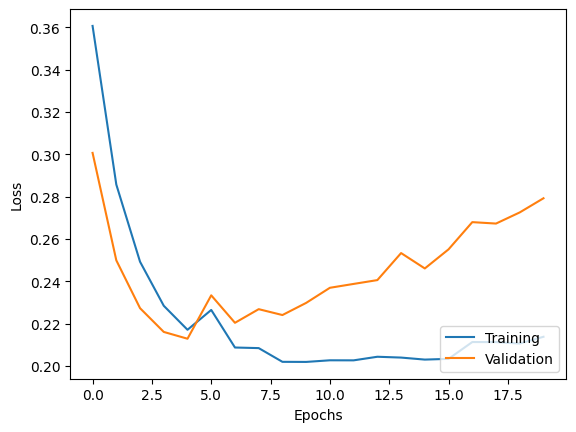

In [ ]:
plt.plot(range(len(epoch_loss_train)), epoch_loss_train,
         label='Training')
plt.plot(range(len(epoch_loss_val)), epoch_loss_val,
        label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

Train acc vs validation acc

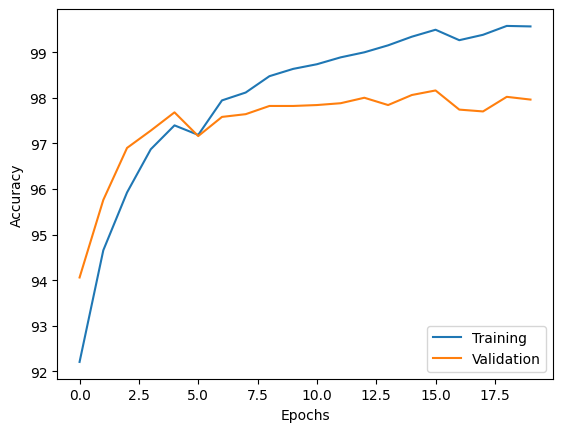

In [ ]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

## Modelo para fashion mnist

In [ ]:
# Parámetros de entrada
num_features = 784  # 28x28 píxeles para Fashion MNIST
num_hidden1 = 100   # Número de neuronas en la primera capa oculta
num_hidden2 = 80    # Número de neuronas en la segunda capa oculta
num_classes = 30    # Número de clases para MNIST
# Crear el modelo
model2 = NeuralNetMLP(num_features, num_hidden1, num_hidden2, num_classes)

In [ ]:
np.random.seed(123) # for the training set shuffling

epoch_loss_train, epoch_loss_val, epoch_train_acc, epoch_valid_acc = train(
    model2, Xf_train, Yf_train, Xf_val, Yf_val,
    num_epochs=50, learning_rate=0.001)

Epoch: 001/050 | Train Loss: 0.7131 | Train Acc: 77.44% | Valid Acc: 78.28%
Epoch: 002/050 | Train Loss: 0.6062 | Train Acc: 83.21% | Valid Acc: 82.66%
Epoch: 003/050 | Train Loss: 0.5653 | Train Acc: 85.17% | Valid Acc: 84.82%
Epoch: 004/050 | Train Loss: 0.5432 | Train Acc: 85.97% | Valid Acc: 85.10%
Epoch: 005/050 | Train Loss: 0.5445 | Train Acc: 86.15% | Valid Acc: 84.82%
Epoch: 006/050 | Train Loss: 0.5271 | Train Acc: 86.85% | Valid Acc: 86.00%
Epoch: 007/050 | Train Loss: 0.5383 | Train Acc: 86.92% | Valid Acc: 85.82%
Epoch: 008/050 | Train Loss: 0.5022 | Train Acc: 88.42% | Valid Acc: 87.14%
Epoch: 009/050 | Train Loss: 0.5120 | Train Acc: 88.12% | Valid Acc: 86.88%
Epoch: 010/050 | Train Loss: 0.5193 | Train Acc: 88.02% | Valid Acc: 86.58%
Epoch: 011/050 | Train Loss: 0.5659 | Train Acc: 86.70% | Valid Acc: 86.20%
Epoch: 012/050 | Train Loss: 0.4976 | Train Acc: 89.43% | Valid Acc: 87.72%
Epoch: 013/050 | Train Loss: 0.5059 | Train Acc: 88.88% | Valid Acc: 87.46%
Epoch: 014/0

In [ ]:
test_mse, test_acc = compute_loss_and_acc(model2, Xf_test, Yf_test, num_labels=10, minibatch_size=100)
print(f'Test accuracy: {test_acc*100:.2f}%')

Test accuracy: 86.05%


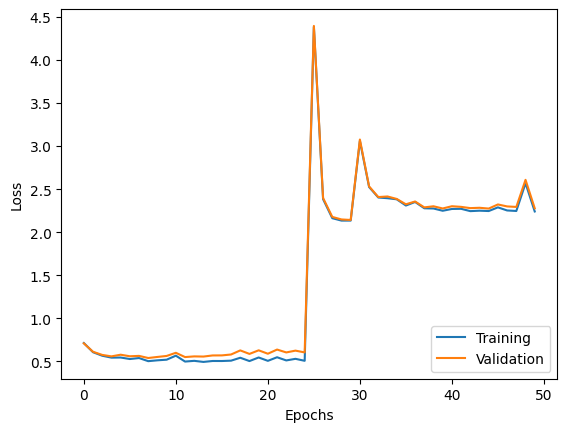

In [ ]:
plt.plot(range(len(epoch_loss_train)), epoch_loss_train,
         label='Training')
plt.plot(range(len(epoch_loss_val)), epoch_loss_val,
        label='Validation')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

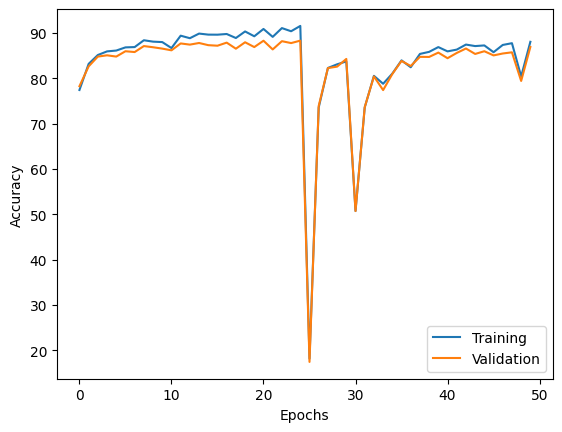

In [ ]:
plt.plot(range(len(epoch_train_acc)), epoch_train_acc,
         label='Training')
plt.plot(range(len(epoch_valid_acc)), epoch_valid_acc,
         label='Validation')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(loc='lower right')
#plt.savefig('figures/11_08.png', dpi=300)
plt.show()

Se observa inestabilidad a pesar de usar los mismos parámetros que usamos para MNIST

# Referencias

Bibliografía:
+ Artificial, I. (2023, enero 30). Entropía Cruzada. Inteligencia Artificial 360. https://inteligenciaartificial360.com/glosario/entropia-cruzada/

+ Pineda Pertuz, C. M. (Octubre de 2021). Aprendizaje automático y profundo en Python. Carátula: ediciones de la U.

+ ¿Qué es la regularización? (2024, octubre 1). Ibm.com. https://www.ibm.com/mx-es/topics/regularization

+ (S/f). Datacamp.com. Recuperado el 14 de enero de 2025, de https://www.datacamp.com/es/tutorial/introduction-to-activation-functions-in-neural-networks